Chapter 17

# 二元高斯KDE
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码使用鸢尾花数据集的前两个特征（即萼片长度 $X_1$ 和萼片宽度 $X_2$）来构建二维核密度估计 (KDE)，从而计算联合概率密度函数 $f_{X1,X2}(x_1, x_2)$。最终，代码通过3D线框图和2D等高线图展示了估计得到的联合分布。

具体步骤如下：

1. **数据准备**：将鸢尾花数据集的萼片长度 $X_1$ 和萼片宽度 $X_2$ 分别作为 $x$ 和 $y$，取值范围设定为 $[4,8]$ 和 $[1,5]$。生成了一个二维网格 $(xx, yy)$，用于存储 $(x, y)$ 的可能取值。

2. **核密度估计**：
   - 使用 `scipy.stats` 库的 `gaussian_kde` 方法对 $(X_1, X_2)$ 的值进行核密度估计，得到联合概率密度函数的近似值。
   - 联合概率密度函数 $f_{X1,X2}(x_1, x_2)$ 表示为：
     $$
     f_{X1,X2}(x_1, x_2) = \frac{1}{nh^2} \sum_{i=1}^n K\left(\frac{x_1 - X_{1i}}{h}\right) K\left(\frac{x_2 - X_{2i}}{h}\right)
     $$
     其中，$K$ 是核函数，$h$ 为带宽，$n$ 为样本总数。

3. **3D线框图和等高线图展示**：
   - 使用3D线框图和等高线图来展示估计的联合概率密度函数 $f_{X1,X2}(x_1, x_2)$。其中，等高线图直观展示了不同密度区域，散点标记了实际的样本点位置。
   - 在3D图中，将联合概率密度作为 $z$ 轴，展示 $f_{X1,X2}(x_1, x_2)$ 的空间分布。等高线图则显示 $f_{X1,X2}(x_1, x_2)$ 的密度级别，直观对比了高密度和低密度区域。

最终，这种方法可直观展示二维数据在特征空间中的分布密度，有助于理解特征间的联合分布模式。

In [1]:
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris

## 加载iris数据集

In [2]:
iris = load_iris()

X = iris.data  # 获取数据
x = X[:, 0]  # 提取第一个特征 (花萼长度)
y = X[:, 1]  # 提取第二个特征 (花萼宽度)

xmin, xmax = 4, 8  # 设置x轴范围
ymin, ymax = 1, 5  # 设置y轴范围

## 执行核密度估计

In [3]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]  # 创建x和y的网格
positions = np.vstack([xx.ravel(), yy.ravel()])  # 将网格位置合并为二维数组

In [4]:
values = np.vstack([x, y])  # 将特征合并为二维数组

In [5]:
kernel = st.gaussian_kde(values)  # 使用高斯核函数进行密度估计

In [6]:
PDF_xy = np.reshape(kernel(positions).T, xx.shape)  # 重塑密度估计结果为网格形状

## 绘制3D线框图

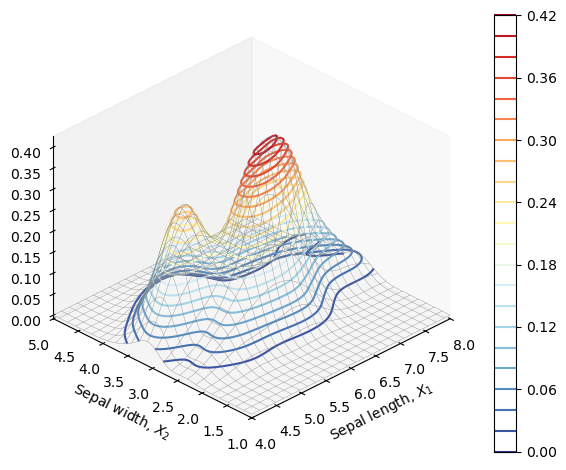

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建3D图形

ax.plot_wireframe(xx, yy, PDF_xy, 
                  rstride=4, cstride=4,  # 设置线框步长
                  color=[0.5, 0.5, 0.5],  # 设置线框颜色
                  linewidth=0.25)  # 设置线框宽度

colorbar = ax.contour(xx, yy, PDF_xy, 20, cmap='RdYlBu_r')  # 绘制等高线
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.set_xlabel(r'Sepal length, $X_1$')  # 设置x轴标签
ax.set_ylabel(r'Sepal width, $X_2$')  # 设置y轴标签
ax.set_zlabel(r'$f_{X1,X2}(x_1,x_2)$')  # 设置z轴标签

ax.set_proj_type('ortho')  # 设置正交投影
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 隐藏网格
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
plt.tight_layout()  # 紧凑布局

## 绘制2D等高线图

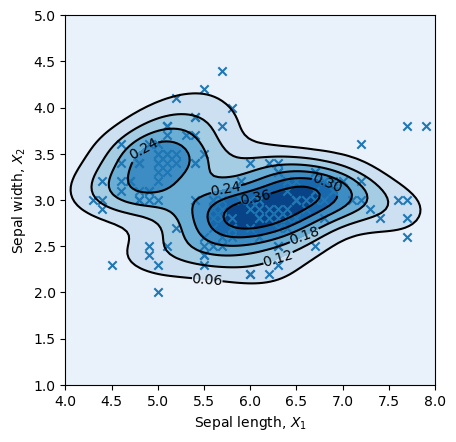

In [8]:
fig = plt.figure()
ax = fig.gca()  # 获取当前子图
ax.set_xlim(xmin, xmax)  # 设置x轴范围
ax.set_ylim(ymin, ymax)  # 设置y轴范围

cfset = ax.contourf(xx, yy, PDF_xy, cmap='Blues')  # 填充等高线图
cset = ax.contour(xx, yy, PDF_xy, colors='k')  # 绘制等高线
plt.scatter(x, y, marker='x')  # 在等高线图上绘制散点

ax.clabel(cset, inline=1, fontsize=10)  # 标签等高线
ax.set_xlabel(r'Sepal length, $X_1$')  # 设置x轴标签
ax.set_ylabel(r'Sepal width, $X_2$')  # 设置y轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置坐标轴比例